# Example classification and testing

In [1]:
import Classifier as cl

In [12]:
#Initialise a Classifier object. Will load features and perform a one-off training of a Random Forest. Prints the 
#out-of-bag score to give an indication that all is working ok.

#At present, the groups that lightcurves are classified into are hardcoded. This could be changed by overwriting
#self.groups in the Classifier object. Note that automatic plotting functions currently assume the hard-coded
#groups. Some simulated groups are ignored (Hybrid (wasn't clear what the different hybrid types were) 
#Transits (this is an awful way to search for transits). Cepheid sub-classes are all 'Cepheid'. Anything with more
#than one label is included as the first label (i.e. Flares are included, but not as a separate label).

B = cl.Classifier(featuredat='feature_files/example_features.txt',
               metadata='metadata_files/Data_Batch_TDA3_all.txt',
               n_estimators=1000,max_features=3,min_samples_split=2)

Loading Data
Loaded
Setting up groups array
Complete
Training Classifier
OOB Score: 0.811202013845
Classifier trained


In [13]:
#perform cross-validation - hiding 10 of the inputs at a time and training on the rest, to produce classifications
#for the 10. Takes a long time to cover all inputs. Uses only 10 at once because some of the classes are quite small.
B.crossValidate()
#comment out to use pre-saved cv_probabilities below


[ 0  1  2  3  4  5  6  7  8  9 10]
[11 12 13 14 15 16 17 18 19 20 21]
[22 23 24 25 26 27 28 29 30 31 32]
[33 34 35 36 37 38 39 40 41 42 43]
[44 45 46 47 48 49 50 51 52 53 54]
[55 56 57 58 59 60 61 62 63 64 65]
[66 67 68 69 70 71 72 73 74 75 76]
[77 78 79 80 81 82 83 84 85 86 87]
[88 89 90 91 92 93 94 95 96 97]
[ 98  99 100 101 102 103 104 105 106 107]
[108 109 110 111 112 113 114 115 116 117]
[118 119 120 121 122 123 124 125 126 127]
[128 129 130 131 132 133 134 135 136 137]
[138 139 140 141 142 143 144 145 146 147]
[148 149 150 151 152 153 154 155 156 157]
[158 159 160 161 162 163 164 165 166 167]
[168 169 170 171 172 173 174 175 176 177]
[178 179 180 181 182 183 184 185 186 187]
[188 189 190 191 192 193 194 195 196 197]
[198 199 200 201 202 203 204 205 206 207]
[208 209 210 211 212 213 214 215 216 217]
[218 219 220 221 222 223 224 225 226 227]
[228 229 230 231 232 233 234 235 236 237]
[238 239 240 241 242 243 244 245 246 247]
[248 249 250 251 252 253 254 255 256 257]
[258 259 260 261

[1788 1789 1790 1791 1792 1793 1794 1795 1796 1797]
[1798 1799 1800 1801 1802 1803 1804 1805 1806 1807]
[1808 1809 1810 1811 1812 1813 1814 1815 1816 1817]
[1818 1819 1820 1821 1822 1823 1824 1825 1826 1827]
[1828 1829 1830 1831 1832 1833 1834 1835 1836 1837]
[1838 1839 1840 1841 1842 1843 1844 1845 1846 1847]
[1848 1849 1850 1851 1852 1853 1854 1855 1856 1857]
[1858 1859 1860 1861 1862 1863 1864 1865 1866 1867]
[1868 1869 1870 1871 1872 1873 1874 1875 1876 1877]
[1878 1879 1880 1881 1882 1883 1884 1885 1886 1887]
[1888 1889 1890 1891 1892 1893 1894 1895 1896 1897]
[1898 1899 1900 1901 1902 1903 1904 1905 1906 1907]
[1908 1909 1910 1911 1912 1913 1914 1915 1916 1917]
[1918 1919 1920 1921 1922 1923 1924 1925 1926 1927]
[1928 1929 1930 1931 1932 1933 1934 1935 1936 1937]
[1938 1939 1940 1941 1942 1943 1944 1945 1946 1947]
[1948 1949 1950 1951 1952 1953 1954 1955 1956 1957]
[1958 1959 1960 1961 1962 1963 1964 1965 1966 1967]
[1968 1969 1970 1971 1972 1973 1974 1975 1976 1977]
[1978 1979 1

array([[ 0.   ,  0.   ,  0.002, ...,  0.   ,  0.009,  0.001],
       [ 0.006,  0.001,  0.244, ...,  0.617,  0.019,  0.032],
       [ 1.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ..., 
       [ 0.004,  0.   ,  0.676, ...,  0.317,  0.001,  0.   ],
       [ 0.035,  0.   ,  0.045, ...,  0.876,  0.007,  0.001],
       [ 0.004,  0.546,  0.   , ...,  0.001,  0.   ,  0.001]])

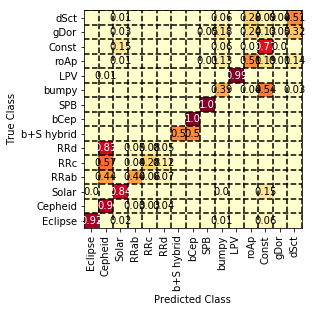

In [14]:
#Make diagnostic plots - here for the noisy data with no detrending whatsoever. 
#Loads pre-saved file if the above box wasn't run

B.makeConfMatrix(cvprobfile='cv_probabilities/example_cvprobs_noisy.txt')
B.plotConfMatrix()


#The result isn't bad (~80% correct overall, and good precision on the eclipses and some other classes)! 
#Key issues - RR Lyrae's get misclassified as Cepheids, bumpy looks fairly flat, 
#and pulsators are unreliable. But note this is on the completely undetrended data, so low-amplitude signals are
#expected to be lost.

#(Separate investigation showed that the misclassified RR Lyrae's don't look like RR Lyraes at all (No sign of a 
#0.5-0.7d strong flux signal), so not sure if the amplitude is so low it's masked by detrending or there's a 
#simulation issue here).

In [7]:
#Now to redo it with the clean data for a confidence boost:

B = cl.Classifier(featuredat='feature_files/clean_features.txt',
               metadata='metadata_files/Data_Batch_TDA3_all.txt',
               n_estimators=1000,max_features=3,min_samples_split=2)

Loading Data
Loaded
Setting up groups array
Complete
Training Classifier
OOB Score: 0.977379830349
Classifier trained


In [8]:
#98%! Somewhat meaningless, but at least we know that if we detrend even a small bit things will improve.

B.crossValidate()

[ 0  1  2  3  4  5  6  7  8  9 10]
[11 12 13 14 15 16 17 18 19 20 21]
[22 23 24 25 26 27 28 29 30 31 32]
[33 34 35 36 37 38 39 40 41 42]
[43 44 45 46 47 48 49 50 51 52]
[53 54 55 56 57 58 59 60 61 62]
[63 64 65 66 67 68 69 70 71 72]
[73 74 75 76 77 78 79 80 81 82]
[83 84 85 86 87 88 89 90 91 92]
[ 93  94  95  96  97  98  99 100 101 102]
[103 104 105 106 107 108 109 110 111 112]
[113 114 115 116 117 118 119 120 121 122]
[123 124 125 126 127 128 129 130 131 132]
[133 134 135 136 137 138 139 140 141 142]
[143 144 145 146 147 148 149 150 151 152]
[153 154 155 156 157 158 159 160 161 162]
[163 164 165 166 167 168 169 170 171 172]
[173 174 175 176 177 178 179 180 181 182]
[183 184 185 186 187 188 189 190 191 192]
[193 194 195 196 197 198 199 200 201 202]
[203 204 205 206 207 208 209 210 211 212]
[213 214 215 216 217 218 219 220 221 222]
[223 224 225 226 227 228 229 230 231 232]
[233 234 235 236 237 238 239 240 241 242]
[243 244 245 246 247 248 249 250 251 252]
[253 254 255 256 257 258 259 26

[1793 1794 1795 1796 1797 1798 1799 1800 1801 1802]
[1803 1804 1805 1806 1807 1808 1809 1810 1811 1812]
[1813 1814 1815 1816 1817 1818 1819 1820 1821 1822]
[1823 1824 1825 1826 1827 1828 1829 1830 1831 1832]
[1833 1834 1835 1836 1837 1838 1839 1840 1841 1842]
[1843 1844 1845 1846 1847 1848 1849 1850 1851 1852]
[1853 1854 1855 1856 1857 1858 1859 1860 1861 1862]
[1863 1864 1865 1866 1867 1868 1869 1870 1871 1872]
[1873 1874 1875 1876 1877 1878 1879 1880 1881 1882]
[1883 1884 1885 1886 1887 1888 1889 1890 1891 1892]
[1893 1894 1895 1896 1897 1898 1899 1900 1901 1902]
[1903 1904 1905 1906 1907 1908 1909 1910 1911 1912]
[1913 1914 1915 1916 1917 1918 1919 1920 1921 1922]
[1923 1924 1925 1926 1927 1928 1929 1930 1931 1932]
[1933 1934 1935 1936 1937 1938 1939 1940 1941 1942]
[1943 1944 1945 1946 1947 1948 1949 1950 1951 1952]
[1953 1954 1955 1956 1957 1958 1959 1960 1961 1962]
[1963 1964 1965 1966 1967 1968 1969 1970 1971 1972]
[1973 1974 1975 1976 1977 1978 1979 1980 1981 1982]
[1983 1984 1

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ..., 
       [ 0.001,  0.   ,  0.989, ...,  0.   ,  0.005,  0.003],
       [ 0.   ,  0.   ,  0.   , ...,  0.992,  0.   ,  0.   ],
       [ 0.002,  0.055,  0.   , ...,  0.   ,  0.   ,  0.   ]])

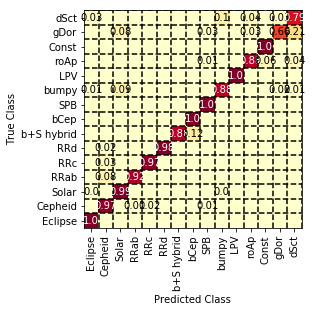

In [11]:
B.makeConfMatrix(cvprobfile='cv_probabilities/example_cvprobs_clean.txt')
B.plotConfMatrix()
#still some issues with mixing up pulsators - maybe the right frequencies aren't being picked up? 
#end result though - any pre-detrending we do before the classifier will give us a result somewhere between the two
#cases shown